# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv('../../datasets/data/dayofweek.csv')
df.head()

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
2,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
3,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4


In [3]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
y_test.value_counts()

dayofweek
3    83
6    69
5    55
1    52
0    31
4    24
2    24
Name: count, dtype: int64

In [8]:
y_train.value_counts()

dayofweek
3    313
6    287
1    222
5    216
2    125
0    105
4     80
Name: count, dtype: int64

In [25]:
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [26]:
y_test_str.value_counts()

dayofweek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64

In [27]:
y_train_str.value_counts()

dayofweek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
logmodel = LogisticRegression(random_state=21, fit_intercept=False)
logmodel.fit(X_train_str, y_train_str)
logpred = logmodel.predict(X_test_str)
print(f'accuracy {accuracy_score(y_test_str, logpred)}')

accuracy 0.6331360946745562


### b. SVM

In [30]:
from sklearn.svm import SVC

In [32]:
model_svm = SVC(kernel='poly', probability=True, random_state=21)
model_svm.fit(X_train_str, y_train_str)
predict_svm = model_svm.predict(X_test_str)
print(f'accuracy {accuracy_score(y_test_str, predict_svm)}')

accuracy 0.8461538461538461


### c. Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=21)
tree_model.fit(X_train_str, y_train_str)
tree_model_pred = tree_model.predict(X_test_str)
print(f'accuracy {accuracy_score(y_test_str, tree_model_pred)}')

accuracy 0.5295857988165681


### d. Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
forest_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
forest_model.fit(X_train_str, y_train_str)
forest_model_pred = forest_model.predict(X_test_str)
print(f'accuracy {accuracy_score(y_test_str, forest_model_pred)}')

accuracy 0.9289940828402367


No, ~8% decrease for random forest in ex03 comparing to random forest in ex02

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [42]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [44]:
logreg = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
logreg.fit(X_train_str, y_train_str)
scores_logreg = cross_val_score(logreg, X_train_str, y_train_str, cv=10)
print(f'avg accuracy: {scores_logreg.mean()}, std dev: {scores_logreg.std()}')

avg accuracy: 0.5815975677169707, std dev: 0.025322132907253592


### b. SVM

In [ ]:
scores_svm = cross_val_score(model_svm, X_train_str, y_train_str, cv=10)
print(f'avg accuracy: {scores_svm.mean()}, std dev: {scores_svm.std()}')

SVC accuracy: 0.7982034273079048, std dev: 0.03006949769988426


### c. Decision tree

In [46]:
scores_decision_tree = cross_val_score(tree_model, X_train_str, y_train_str, cv=10)
print(f'avg accuracy: {scores_decision_tree.mean()}, std dev: {scores_decision_tree.std()}')

avg accuracy: 0.5088944168048645, std dev: 0.031903139495514356


### d. Random forest

In [47]:
scores_random_forest = cross_val_score(forest_model, X_train_str, y_train_str, cv=10)
print(f'avg accuracy: {scores_random_forest.mean()}, std dev: {scores_random_forest.std()}')

avg accuracy: 0.9176561636263129, std dev: 0.02159583796321821


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [57]:
max_avg_accuracy = 0
min_std_dev = 0
for i in range(1,120):
    for j in range(1,30):
        forest_model_test = RandomForestClassifier(n_estimators=i, max_depth=j)
        forest_model_test.fit(X_test_str, y_test_str)
        accuracy_stats = cross_val_score(forest_model_test, X_train_str, y_train_str, cv=10)
        print(f'n_estimators = {i} max_depth = {j} avg accuracy = {accuracy_stats.mean()} std dev = {accuracy_stats.std()}')
        max_avg_accuracy = max(max_avg_accuracy, accuracy_stats.mean())
        min_std_dev = min(min_std_dev, accuracy_stats.std())
        if accuracy_stats.mean() == max_avg_accuracy and accuracy_stats.std() == min_std_dev:
            best_n_estimators = i
            best_max_depth = j
print(f'Best params: n_estimators = {best_n_estimators} max_depth = {best_max_depth}')

n_estimators = 1 max_depth = 1 avg accuracy = 0.27895522388059696 std dev = 0.0501326212202127
n_estimators = 1 max_depth = 2 avg accuracy = 0.3205196241017137 std dev = 0.03800570518966544
n_estimators = 1 max_depth = 3 avg accuracy = 0.3338419016030956 std dev = 0.05026993784215722
n_estimators = 1 max_depth = 4 avg accuracy = 0.39973466003316743 std dev = 0.07475765538788372
n_estimators = 1 max_depth = 5 avg accuracy = 0.43390270867882813 std dev = 0.06303014080835183
n_estimators = 1 max_depth = 6 avg accuracy = 0.4651354339414041 std dev = 0.053278821870425076
n_estimators = 1 max_depth = 7 avg accuracy = 0.4821835268103925 std dev = 0.06048815330165735
n_estimators = 1 max_depth = 8 avg accuracy = 0.5230016583747927 std dev = 0.05126388189038104
n_estimators = 1 max_depth = 9 avg accuracy = 0.4866058595909342 std dev = 0.058909898797764246
n_estimators = 1 max_depth = 10 avg accuracy = 0.5637258153676065 std dev = 0.0701167486757755
n_estimators = 1 max_depth = 11 avg accuracy =

In [58]:
optimized_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
optimized_model.fit(X_train_str, y_train_str)
print(f'accuracy {accuracy_score(y_test_str, optimized_model.predict(X_test_str))}')

accuracy 0.9378698224852071


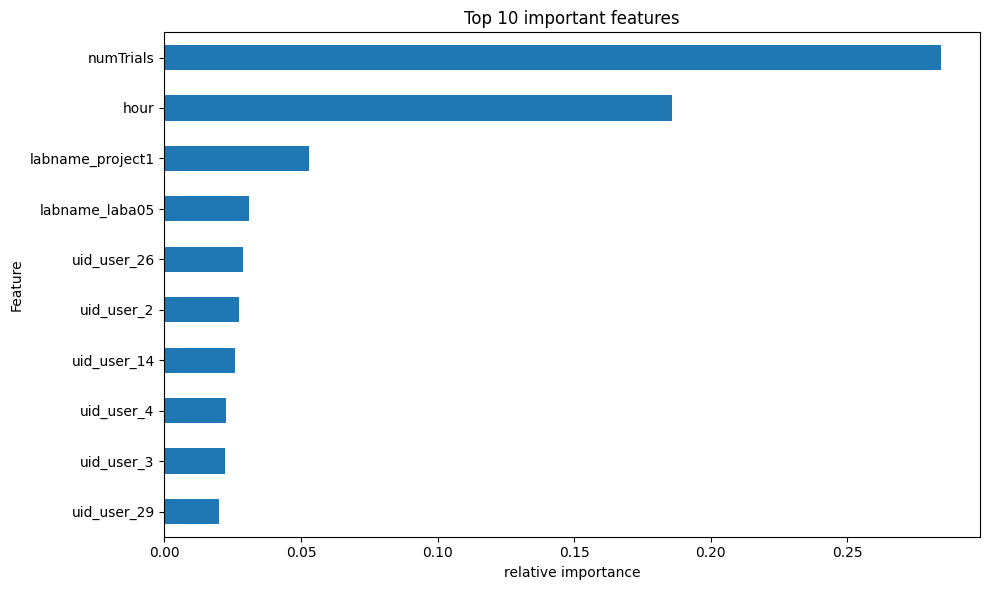

In [59]:
def plot_feature_importance(importance_values, feature_names, top_n, title):
    calculated_importance = None

    if isinstance(importance_values, list) and all(hasattr(est, 'coef_') for est in importance_values):
        all_coefs = np.array([est.coef_[0] if est.coef_.ndim == 2 else est.coef_ for est in importance_values])
        calculated_importance = np.sum(np.abs(all_coefs), axis=0)
        xlabel_text = 'Sum of absolute values of coefficients'
    elif isinstance(importance_values, np.ndarray):
        if importance_values.ndim > 1:
            calculated_importance = np.sum(np.abs(importance_values), axis=0)
            xlabel_text = 'Sum of absolute values of coefficients'
        else:
            calculated_importance = np.abs(importance_values)
            if np.all(importance_values >= 0) and np.isclose(np.sum(importance_values), 1.0):
                xlabel_text = 'relative importance'
            else:
                xlabel_text = 'absolute importance'
    else:
        raise TypeError("Ошибка йоу")

    importance_series = pd.Series(calculated_importance, index=feature_names)

    top_features = importance_series.nlargest(top_n)

    plt.figure(figsize=(10, 6))
    top_features.sort_values().plot(kind='barh')
    plt.title(title)
    plt.xlabel(xlabel_text)
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


plot_feature_importance(optimized_model.feature_importances_, X.columns, top_n=10, title='Top 10 important features')

In [60]:
import joblib

In [61]:
joblib.dump(optimized_model, 'optimized_model.pkl')

['optimized_model.pkl']

In [62]:
optimized_model_loaded = joblib.load('optimized_model.pkl')
print(f'accuracy {accuracy_score(y_test_str, optimized_model_loaded.predict(X_test_str))}')

accuracy 0.9378698224852071
